<a href="https://colab.research.google.com/github/lafunes/Machine_Learning/blob/main/ML_Hw6_FunesVelasquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/ML/Assignment 6')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
file_path2 = '/content/gdrive/My Drive/ML/Assignment 6/Housing.csv'
Housing = pd.DataFrame(pd.read_csv(file_path2))
Housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


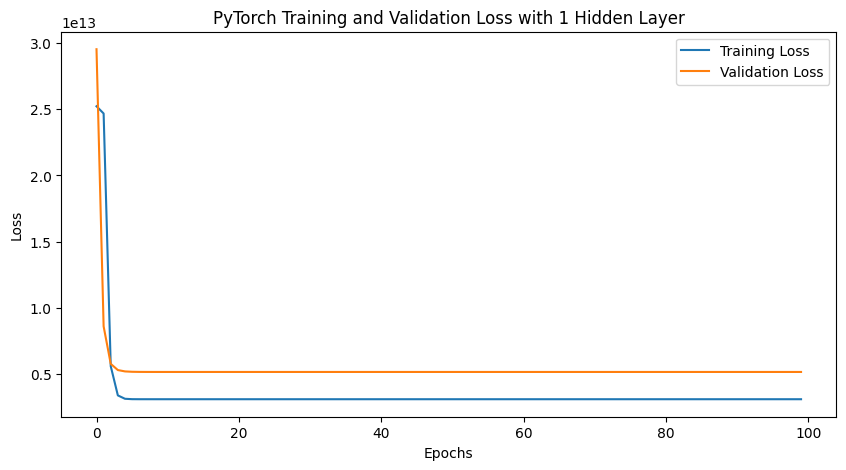

In [ ]:
# Q1 Pytorch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
df = pd.read_csv('Housing.csv')

# Fill NaN values if any
df.fillna(method='ffill', inplace=True)

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.drop('price')  # Assuming 'price' is the target

# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(), categorical_cols)
])

# Separate features and target variable
X = df.drop('price', axis=1)
y = df['price'].values

# Apply transformations to the feature set
X_processed = preprocessor.fit_transform(X)

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_processed.astype(np.float32))
y_tensor = torch.tensor(y.astype(np.float32)).unsqueeze(1)

# Split the data into training and validation sets
seed = 42
torch.manual_seed(seed)
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=seed)

# Define the neural network using Sequential
input_size = X_train.shape[1]
model = nn.Sequential(
    nn.Linear(input_size, 32),
    nn.Tanh(),
    nn.Linear(32, 1)
)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 100
train_losses = []
val_losses = []
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    train_losses.append(loss.item())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation
    with torch.no_grad():
        y_val_pred = model(X_val)
        val_loss = criterion(y_val_pred, y_val)
    val_losses.append(val_loss.item())


# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('PyTorch Training and Validation Loss with 1 Hidden Layer')
plt.legend()
plt.show()


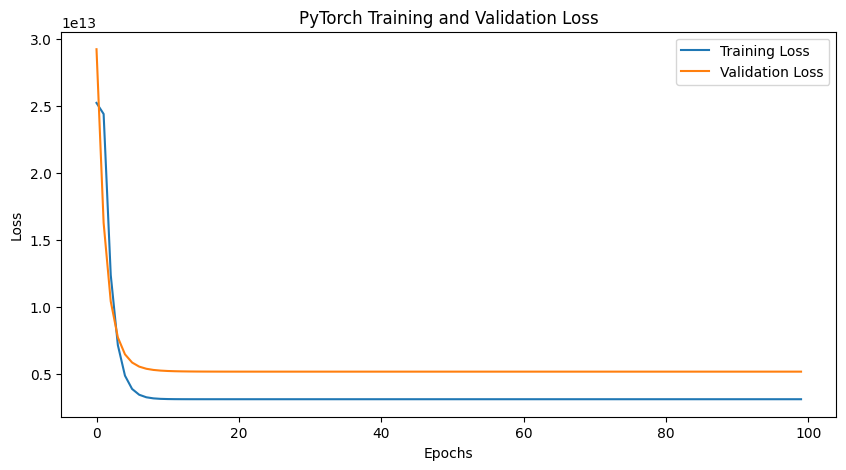

In [ ]:
# Q.1B  3 Hidden layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
df = pd.read_csv('Housing.csv')

# Fill NaN values if any
df.fillna(method='ffill', inplace=True)

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.drop('price')

# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(), categorical_cols)
])

# Separate features and target variable
X = df.drop('price', axis=1)
y = df['price'].values

# Apply transformations to the feature set
X_processed = preprocessor.fit_transform(X)

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_processed.astype(np.float32))
y_tensor = torch.tensor(y.astype(np.float32)).unsqueeze(1)

# Split the data into training and validation sets
seed = 42
torch.manual_seed(seed)
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=seed)

# Define a more complex neural network using Sequential
input_size = X_train.shape[1]
model = nn.Sequential(
    nn.Linear(input_size, 32),
    nn.Tanh(),
    nn.Linear(32, 64),
    nn.Tanh(),
    nn.Linear(64, 16),
    nn.Tanh(),
    nn.Linear(16, 1)
)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 100
train_losses = []
val_losses = []
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    train_losses.append(loss.item())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        y_val_pred = model(X_val)
        val_loss = criterion(y_val_pred, y_val)
    val_losses.append(val_loss.item())
    model.train()  # Set the model back to training mode



# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('PyTorch Training and Validation Loss with 3 Hidden Layers')
plt.legend()
plt.show()


In [ ]:
cifar10_dir = r'/Users/voeh/Downloads/cifar-10-batches-py'


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time

# Set the directory for the CIFAR-10 dataset
cifar10_dir = r'/Users/voeh/Downloads/cifar-10-batches-py'

# Load CIFAR-10 dataset from the specified directory
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root=cifar10_dir, train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=cifar10_dir, train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Define a Neural Network
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)  # CIFAR-10 images are 32x32x3
        self.fc2 = nn.Linear(512, 10)  # 10 classes

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = NeuralNet()

# Define Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network
start_time = time.time()
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

end_time = time.time()
training_time = end_time - start_time
print('Finished Training')
print(f"Training time: {training_time:.2f} seconds")

# Test the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f}%')


100%|██████████| 170498071/170498071 [00:03<00:00, 47403061.77it/s]


Extracting /Users/voeh/Downloads/cifar-10-batches-py/cifar-10-python.tar.gz to /Users/voeh/Downloads/cifar-10-batches-py
Files already downloaded and verified
[1,  2000] loss: 1.820
[1,  4000] loss: 1.673
[1,  6000] loss: 1.642
[1,  8000] loss: 1.609
[1, 10000] loss: 1.596
[1, 12000] loss: 1.570
[2,  2000] loss: 1.482
[2,  4000] loss: 1.479
[2,  6000] loss: 1.482
[2,  8000] loss: 1.499
[2, 10000] loss: 1.459
[2, 12000] loss: 1.469
Finished Training
Training time: 314.16 seconds
Accuracy of the network on the 10000 test images: 48.78%


In [ ]:
# Q2B
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time

# Set the directory for the CIFAR-10 dataset
cifar10_dir = r'/path/to/cifar-10'

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root=cifar10_dir, train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=cifar10_dir, train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Define an extended Neural Network
class ExtendedNeuralNet(nn.Module):
    def __init__(self):
        super(ExtendedNeuralNet, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

net = ExtendedNeuralNet()

# Define Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network
start_time = time.time()
for epoch in range(300):  # Increase the number of epochs
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

end_time = time.time()
training_time = end_time - start_time
print('Finished Training')
print(f"Training time: {training_time:.2f} seconds")

# Test the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f}%')


100%|██████████| 170498071/170498071 [00:02<00:00, 75749693.79it/s]


Extracting /path/to/cifar-10/cifar-10-python.tar.gz to /path/to/cifar-10
Files already downloaded and verified
[1,  2000] loss: 2.064
[1,  4000] loss: 1.791
[1,  6000] loss: 1.700
[1,  8000] loss: 1.632
[1, 10000] loss: 1.568
[1, 12000] loss: 1.549
[2,  2000] loss: 1.463
[2,  4000] loss: 1.446
[2,  6000] loss: 1.470
[2,  8000] loss: 1.429
[2, 10000] loss: 1.410
[2, 12000] loss: 1.430
[3,  2000] loss: 1.319
[3,  4000] loss: 1.301
[3,  6000] loss: 1.331
[3,  8000] loss: 1.329
[3, 10000] loss: 1.321
[3, 12000] loss: 1.322
[4,  2000] loss: 1.220
[4,  4000] loss: 1.228
[4,  6000] loss: 1.241
[4,  8000] loss: 1.233
[4, 10000] loss: 1.220
[4, 12000] loss: 1.229
[5,  2000] loss: 1.156
[5,  4000] loss: 1.125
[5,  6000] loss: 1.137
[5,  8000] loss: 1.139
[5, 10000] loss: 1.168
[5, 12000] loss: 1.152
[6,  2000] loss: 1.022
[6,  4000] loss: 1.068
[6,  6000] loss: 1.086
[6,  8000] loss: 1.085
[6, 10000] loss: 1.088
[6, 12000] loss: 1.109
[7,  2000] loss: 0.953
[7,  4000] loss: 0.998
[7,  6000] loss